Digital Assignment 3 - Machine Learning
Vishhvak Srinivasan, 16BCE1269

In [289]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')
%config InlineBackend.figure_format = 'svg'
pkmn = pd.read_csv("Pokemon.csv")
pkmn.loc[pkmn['Legendary']==False,'Legendary']=0
pkmn.loc[pkmn['Legendary']==True,'Legendary']=1
pkmn = pkmn.drop(['#','Name','Type 1','Type 2','Generation'],axis=1)
pkmn.isnull().sum()
pkmn.head()

,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Legendary
0,318,45,49,49,65,65,45,0
1,405,60,62,63,80,80,60,0
2,525,80,82,83,100,100,80,0
3,625,80,100,123,122,120,80,0
4,309,39,52,43,60,50,65,0


In [290]:
y = pkmn['Legendary'].values
X = pkmn[['Total','Sp. Def']].values

In [291]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_std = sc.fit_transform(X)

In [292]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_std, y, test_size=0.2, random_state=0)

In [293]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(C=100.0, random_state=0)
lr.fit(X_train, y_train)

LogisticRegression(C=100.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=0, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

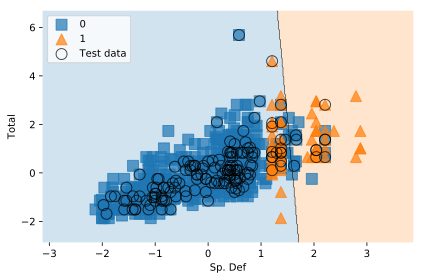

In [294]:
from mlxtend.plotting import plot_decision_regions
import matplotlib.pyplot as plt
%matplotlib inline
scatter_kwargs = {'s': 120, 'edgecolor': None, 'alpha': 0.7}
contourf_kwargs = {'alpha': 0.2}
scatter_highlight_kwargs = {'s': 120, 'label': 'Test data', 'alpha': 0.7}
X_combined = np.vstack((X_train, X_test))
y_combined = np.hstack((y_train, y_test))
plot_decision_regions(X_combined, y_combined, clf=lr, legend=2,
                      X_highlight=X_test,
                      scatter_kwargs=scatter_kwargs,
                      contourf_kwargs=contourf_kwargs,
                      scatter_highlight_kwargs=scatter_highlight_kwargs)
#plot_decision_regions(X_combined_std, y_combined, clf=lr, legend=2)

plt.xlabel('Sp. Def')
plt.ylabel('Total')
plt.legend(loc='upper left')
plt.tight_layout()
# plt.savefig('./figures/logistic_regression.png', dpi=300)
plt.show()

# Metrics

### Classifcation Accuracy 

In [295]:
print(lr.score(X_test, y_test)*100, '%')

91.875 %


Classification accuracy is 91.875%

Null accuracy: accuracy that could be achieved by always predicting the most frequent class

We must always compare with this to ensure our model is not a dumb model and predicts only the most frequent class all the time instead of making learned decisions.

In [296]:
from collections import Counter
print(Counter(y_test))
print(y_test.mean())

Counter({0: 145, 1: 15})
0.09375


~9.3% of the values in y_test are 1s, instead of 0s. Clearly we can infer that this is an imbalanced class distribution. This is the case for the entire dataset as well, and can be inferred easily with logic as the number of 'Legendary' pokemon are very less due to their rarity in the game as opposed to common baseline pokemon, which is easy to find. 

In [297]:
1 - y_test.mean()

0.90625

In contrast, 90.625% of the values correspond to 0, which is baseline pokemon. 

In [298]:
#Null accuracy
max(y_test.mean(), 1 - y_test.mean())

0.90625

This means that a dumb model that always predicts 0, i.e baseline pokemon would be right ~91% of the time, which is close to the result of our accuracy obtained previously as 91.8%.

This shows how classification accuracy is not that good as it's close to a dumb model.
This is a good way to know the minimum we should achieve with our models.

### Confusion Matrix, Classification Report

In [299]:
from sklearn.metrics import classification_report, confusion_matrix
def report(predictions, Y_test):
    print('Confusion Matrix:\n\n',confusion_matrix(Y_test,predictions))
    print("\n")
    print('Classification Report:\n\n',classification_report(Y_test,predictions,target_names=['0','1']))
    print('Misclassified samples: %d' % (Y_test != predictions).sum())
    return

In [300]:
predictions = lr.predict(X_test)
report(predictions, y_test)

Confusion Matrix:

 [[141   4]
 [  9   6]]


Classification Report:

               precision    recall  f1-score   support

           0       0.94      0.97      0.96       145
           1       0.60      0.40      0.48        15

   micro avg       0.92      0.92      0.92       160
   macro avg       0.77      0.69      0.72       160
weighted avg       0.91      0.92      0.91       160

Misclassified samples: 13


Confusion Matrix here is a table containing 4 entries - 

1. True Positives (TP): We correctly predicted that the pokemon is legendary = 6
2. True Negatives (TN): We correctly predicted that the pokemon is not legnedary = 141
3. False Positives (FP): We incorrectly predicted that the pokemon is legendary (a "Type I error") = 4
4. False Negatives (FN): We incorrectly predicted that the pokemon is not legendary (a "Type II error") = 9

0: Baseline
1: Legendary

Classification Report contains metrics - Precision, Recall, F1-Score

1. Precision = Number of records that were correctly selected 
2. Recall = Number of correct records that were selected
3. F1-Score = Weighted harmonic mean of the precision and recall

Precision = TP / (TP + FP)

Recall = TP / (TP + FN)

F1 = 2 * (precision * recall) / (precision + recall)

Intuitively, precision is the ability of the classifier not to label as positive a sample that is negative, and recall is the ability of the classifier to find all the positive samples.



Inference for our dataset -

Clearly we can see that our precision and recall for class 0, i.e baseline is very high - 0.94, 0.97 respectively. I
n contrast, for our target class '1' - Legendary, it is very low 0.6, 0.4 respectively. 

The f1-score for target class '1' is also very low - 0.48. This is completely opposite to the accuracy of classification we got as ~91%. Therefore these metrics are better indicators of our model's performance for our task of predicting a pokemon as legendary. 

These low values are due to our dataset being imbalanced, containing very few legendary pokemon than baseline pokemon, which is a huge number. 

The inference here, is that Classification accuracy is the easiest classification metric to calculate, but it hides the underlying truth of the distribution of target values, especially the case of an imbalanced distribution. We overcome this by calculating the null accuracy.

### Sensitivity, Specificity, False Positive Rate

Sensitivity: When the actual value is positive, how often is the prediction correct?
(We want to maximize sensitivity for better perfornance)
 - Indicates How "sensitive" is the classifier to detecting positive instances?
 - Also known as "True Positive Rate" or "Recall"
 - Sensitivity = TP / (TP + FN)


In [301]:
confusion = confusion_matrix(y_test, predictions)
TP = confusion[1, 1]
TN = confusion[0, 0]
FP = confusion[0, 1]
FN = confusion[1, 0]
from sklearn.metrics import recall_score
sensitivity = TP / float(FN + TP)
print(sensitivity)
print(recall_score(y_test, predictions))

0.4
0.4


Specificity: When the actual value is negative, how often is the prediction correct?
(This is also something we want to maximize)

- How "specific" (or "selective") is the classifier in predicting positive instances?
- Specificity = TN / (TN + FP)


In [302]:
specificity = TN / (TN + FP)

print(specificity)

0.9724137931034482


Inference - Our classifier is Highly specific, poorly sensitive.

False Positive Rate: When the actual value is negative, how often is the prediction incorrect?

In [303]:
false_positive_rate = FP / float(TN + FP)

print(false_positive_rate)
print(1 - specificity)

0.027586206896551724
0.02758620689655178


### Balanced Accuracy Score

The balanced accuracy in binary and multiclass classification problems to deal with imbalanced datasets. It is defined as the average of recall obtained on each class.

In [304]:
from sklearn.metrics import balanced_accuracy_score
balanced_accuracy_score(y_test, predictions)

0.6862068965517241

68% is a better indicator of our accuracy for the model, as opposed to previous metrics considered. This is due to the  definition the metric being equivalent to accuracy_score with class-balanced sample weights, to take into account the imbalanced nature of the dataset. This tells us roughly how this model may perform if the weights for the classes are equalised, but this still falls short of giving us a better accuracy when a model is trained on a balanced dataset of the same nature.

### Receiver Operating Characteristic (ROC) Curves

To Visualize how sensitivity and specificity are affected by various thresholds, without actually changing the threshold.

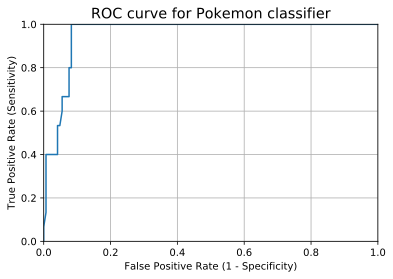

In [305]:
from sklearn.metrics import roc_curve
y_pred_prob = lr.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
plt.plot(fpr, tpr)
plt.xlim([0.0, 1])
plt.ylim([0.0, 1])
plt.rcParams['font.size'] = 12
plt.title('ROC curve for Pokemon classifier')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.grid(True)

In [306]:
def evaluate_threshold(threshold):
    print('Sensitivity:', tpr[thresholds > threshold][-1])
    print('Specificity:', 1 - fpr[thresholds > threshold][-1])

In [307]:
evaluate_threshold(0.5)

Sensitivity: 0.4
Specificity: 0.993103448275862


In [308]:
evaluate_threshold(0.1)

Sensitivity: 1.0
Specificity: 0.9172413793103449


Clearly, a threshold of 0.1 gives us maximum sensitivity, which is desirable for our classifier as legendary pokemon shouldn't be classified as baseline more than baseline pokemon being classified as legendary, since the number of legendary pokemon is much lesser than the number of baseline pokemon, i.e cannot tolerate false negatives, we want to optimize sensitivity. 

### Adjusting the classification threshold

In [309]:
# predict diabetes if the predicted probability is greater than 0.3
from sklearn.preprocessing import binarize
# it will return 1 for all values above 0.3 and 0 otherwise
# results are 2D so we slice out the first column
y_pred_prob = lr.predict_proba(X_test)[:,1].reshape(-1,1)
y_pred_class = binarize(y_pred_prob, 0.1)

In [310]:
print(confusion)

[[141   4]
 [  9   6]]


In [311]:
print(confusion_matrix(y_test, y_pred_class))

[[132  13]
 [  0  15]]


In [312]:
print(classification_report(y_test, y_pred_class))

              precision    recall  f1-score   support

           0       1.00      0.91      0.95       145
           1       0.54      1.00      0.70        15

   micro avg       0.92      0.92      0.92       160
   macro avg       0.77      0.96      0.83       160
weighted avg       0.96      0.92      0.93       160



In [313]:
sensitivity = 15 / (15+0)
print('Sensitivity = ', sensitivity)

Sensitivity =  1.0


Clearly, from our previous result, we knew that the number of legendary pokemon in our testing set was 15, and with the threshold of 0.2, we have achieved 100% accuracy in predicting all 15 pokemon as legendary, tolerating False positives of baseline pokemon being predicted as legnedary. This is okay as the dataset has baseline pokemon with stats as high as few legendary pokemon. Optimizing sensitivity has given us better recall, which is what we desire in our use case of predicting legendary pokemon in a dataset.

### AUC (Area Under Curve of ROC curves)

AUC is the percentage of the ROC plot that is underneath the curve:

AUC is useful as a single number summary of classifier performance.
Higher value = better classifier.

If you randomly chose one positive and one negative observation, AUC represents the likelihood that your classifier will assign a higher predicted probability to the positive observation.

AUC is useful even when there is high class imbalance (unlike classification accuracy), which is helpful in our case.

In [314]:
from sklearn.metrics import roc_auc_score
print(roc_auc_score(y_test, y_pred_prob))

0.9586206896551723


This is close to our average f1-score (~0.93), representing the correct ccuracy for our imbalanced dataset.

In [315]:
from sklearn.model_selection import cross_val_score
cross_val_score(lr, X, y, cv=10, scoring='roc_auc').mean()

0.9688572133777612

Inference - Confusion Matrix and Classification Accuracy are not bad measures of accuracy, but ROC curves and AUC are better indicators of accuracy when in cases of imbalanced datasets.